**Równania Różniczkowe w Technice** - W13, PWr

Projekt - semestr zimowy 2021/22

**Temat:** *Charakterystyka przepływu prądu w układach RLC*.

**Autorzy:**

* Adam Kawałko, 262329
* Mateusz Machaj, 262288

**Abstrakt:**

W naszej pracy przedstawimy działanie obwodu RLC, rozwiążemy równanie różniczkowe na kilka sposobów.
Będziemy korzystać z praw Kirchhoffa, prawa Ohma oraz prawa Faradaya. Porównamy także wyniki eksperymentalne z analizą teoretyczną.

Zajmiemy się zjawiskiem rezonansu oraz jego konsekwencjami, a także przebiegiem natężenia i napięcia w różnych warunkach. 

---

### Import bibliotek i format

Import bibliotek *Python*:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import pandas as pd

Parametry wykresów:

In [2]:
plt.rcParams["axes.grid"] = True

Format wyświetlanych grafik:

In [3]:
HTML(
    """
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
"""
)


---

# Obwód RLC

Co to jest **RLC**? 
**RLC** to skrót dla obwodów elektrycznych, w których skład wchodzą tylko trzy elementy pasywne: 
- rezystor (**R**),
- cewka (**L**),
- kondensator (**C**).

Elementy **RLC** mogą być połączone na różne sposoby, mogą też występować obwody bez cewki **L** lub bez kondensatora **C**. Nas jednak będą interesowały najciekawsze układy - z wszystkimi trzema rodzajami elementów. [[1]](#bib1)

Pochylimy się głównie nad ich podłączeniem szeregowym w jednym oczku, ale warto zwrócić uwagę, że konfiguracji może być wiele - na przykład równoległe podłączenia oraz układy złożone z wielu oczek. Do badania charakterystyki użyjemy też innych elementów, takich jak przełącznik czy bezpiecznik.

<img src="images/rlc_1.png" style="width: 40%" alt="Szeregowy układ RLC"> 

<center> Rysunek 1. Szeregowy układ RLC <a id="rys1"></a>

# Wyprowadzenie równania

Rozpatrzmy układ szeregowy z jednym oczkiem, źródłem prądu i trzema elementami pasywnymi: opornikiem, cewką oraz kondensatorem [[2]](#bib2). 

Korzystając z **drugiego prawa Kirchhoffa**, dzięki któremu wiemy, że całkowity spadek napięcia w obwodzie zamkniętym równy jest przyłożonej sile elektromotorycznej, możemy napisać:

$$U_R + U_L + U_C = {\mathcal {E}}(t).$$

Spadek napięcia $U_R$ na oporniku to według **prawa Ohma** iloczyn natężenia prądu $I$ oraz oporu $R$, stąd 


$$U_R = RI.$$

Według **prawa Faradaya** spadek napięcia na cewce to iloczyn jej indukcyjności $L$ i prędkości zmian prądu w czasie $\frac{dI}{dt}$, dlatego mamy 

$$U_L = L\frac{dI}{dt}.$$

Natomiast spadek napięcia na kondensatorze to iloraz ładunku kondensatora $q$ i jego pojemności $C$, stąd mamy

$$U_C=\frac{Q}{C}.$$

Nasze równanie $U_R + U_L + U_C = {\mathcal {E}}(t)$ możemy zapisać zatem jako

$$L\frac{dI}{dt} + RI + \frac{Q}{C} = {\mathcal {E}}.$$

Wiemy, że zależność natężenia to ładunku kondensatora zapisujemy $I=\frac{dQ}{dt}$, stąd różniczkując obustronnie względem $t$ dostaniemy

$$L\frac{d^2}{dt^2}I(t)+R\frac{d}{dt}I(t)+\frac{1}{C}I(t)=\frac{d}{dt}{\mathcal {E}}(t).$$

# Rozwiązanie analityczne równania

Mając już dobry wstęp teoretyczny do zjawiska i wzoru je opisującego możemy przejść do analiz. Zaczniemy oczywiście od rozwiązania równania głównego symbolicznie.

Rozważymy przypadek, gdzie siła elektromotoryczna będzie prostą funkcją okresową, np. ${\mathcal {E}}(t)=U_0 \cos(\omega t)$. Oznacza to, że mamy do czynienia z klasycznym przypadkiem prądu przemiennego. Zaniedbujemy na razie kwestię przesunięcia w fazie napięcia źródła, gdyż to nie jest tak istotne dla całości rozważania. Równanie ma wtedy postać

$$L\frac{d^2}{dt^2}I(t)+R\frac{d}{dt}I(t)+\frac{1}{C}I(t)=-U_0\omega \sin(\omega t),$$

gdyż ${\mathcal {E}}'(t) = (U_0 \cos(\omega t))'=-U_0\omega \sin(\omega t).$

## Rozwiązania zanikające  

Na początku znajdujemy rozwiązania układu jednorodnego [[3]](#bib3)
$$L\frac{d^2I}{dt^2}+R\frac{dI}{dt}+\frac{I}{C}=0.$$

Nasz wielomian charakterystyczny będzie postaci
$$L\lambda^2+R\lambda+\frac{1}{C}=0.$$

$$\Delta = R^2 - \frac{4L}{C};$$
$$\lambda_{1,2} = \frac{-R\pm \sqrt{R^2 - \frac{4L}{C}}}{2L}.$$

Możemy użyć uproszczonych zmiennych $\alpha = \frac{R}{2L}$ oraz $\omega_0 = \frac{1}{\sqrt{LC}}$. Wtedy 

$$\lambda_{1,2} = -\alpha \pm \sqrt{\alpha^2-\omega_0^2}.$$


*  Gdy $\Delta < 0 \iff \omega_0 > \alpha$ (tłumienie słabe) rozwiązanie ogólne równania to

$$I(t) = e^{-\alpha t}(C_1 \cos(\sqrt{\omega_0^2-\alpha^2}\,t)+C_2 \sin(\sqrt{\omega_0^2-\alpha^2}\, t)).$$

* Gdy $\Delta = 0 \iff \omega_0 = \alpha$ rozwiązanie ogólne ma postać

$$I(t) = C_1 e^{-\alpha t} + C_2 t e^{-\alpha t}.$$


* Gdy $\Delta > 0 \iff \omega_0 < \alpha$ (tłumienie silne) otrzymujemy rozwiązanie

$$I(t) = C_1 e^{-\alpha + \sqrt{\alpha^2-\omega_0^2} t} + C_2 e^{-\alpha - \sqrt{\alpha^2-\omega_0^2} t}.$$


## Rozwiązania "stanu stabilnego"

Następnie szukamy funkcji $\varphi(t)$ - liniowo niezależnego rozwiązania układu niejednorodnego. Stosujemy metodę przewidywania.

Niech 

$$\varphi(t) = D_1 \cos(\omega t) + D_2 \sin(\omega t),$$

$$\varphi ' (t)=\omega(-D_1 \sin(\omega t) + D_2\cos(\omega t)),$$

$$\varphi '' (t) = \omega^2 (-D_1 \cos(\omega t)-D_2\sin(\omega t)).$$

Po podstawieniu do bazowego równania otrzymujemy

$$(-D_1 L \omega^2 + D_2 R \omega + \frac{D_1}{C})\cos(\omega t ) + (-D_2 L \omega^2 - D_1 R \omega + \frac{D_2}{C})\sin(\omega t) = - U_0\omega \sin(\omega t),$$

dlatego

$$
\left\{
    \begin{array}\\
        -D_1 L \omega^2 + D_2 R \omega + \frac{D_1}{C} = 0\\
        -D_2 L \omega^2 - D_1 R \omega + \frac{D_2}{C} = -U_0 \omega
    \end{array}.
\right.
$$
Ostatecznie 
$$
\left\{
    \begin{array}\\
        D_1 = U_0\omega\frac{R\omega}{R^2\omega^2+(L\omega^2-\frac{1}{C})^2}\\
        D_2 = U_0\omega\frac{L\omega^2-\frac{1}{C}}{R^2\omega^2+(L\omega^2-\frac{1}{C})^2}
    \end{array}.
\right.
$$

Równie dobrze [[4]](#bib4) można jednak zastosować zapis

$$\varphi(t) = A \cos(\omega t - \theta).$$

Znajdujemy zatem amplitudę i przesunięcie fazowe, prosto wyprowadzając zależności $A = \sqrt{D_1^2+D_2^2}$ i $\theta = \arctan{\frac{D_2}{D_1}}$. Zakładamy przy okazji, że $\omega>0$, bo zerowe nie da żadnych ciekawych efektów, a ujemne jest równoznaczne z przesunięciem w fazie źródła (kosinus akurat w ogóle się by nie zmienił). Łatwiej będzie zatem analizować zachowanie układu pisząc

$$\varphi(t) = \frac{U_0}{\sqrt{R^2+(L\omega-\frac{1}{C\omega })^2}} \cos(\omega t - \arctan{(\frac{L\omega}{R}-\frac{1}{RC\omega})}).$$

W bardziej klasycznej formie można to przedstawić jako

$$\varphi(t) = \frac{\omega}{L}\cdot\frac{U_0}{\sqrt{4\alpha^2\omega^2+(\omega_0^2-\omega^2 })^2} \cos(\omega t - \arctan{(\frac{2\alpha\omega}{\omega_0^2-\omega^2}}).$$

## Ogólne rozwiązania

I rozwiązania ogólne układów niejednorodnych to odpowiednio dla wskazanych przypadków [[3]](#bib3):

* $I(t) = e^{-\alpha t}(C_1 \cos(\sqrt{\omega_0^2-\alpha^2}\,t)+C_2 \sin(\sqrt{\omega_0^2-\alpha^2}\, t)) + \frac{\omega}{L}\cdot\frac{U_0}{\sqrt{4\alpha^2\omega^2+(\omega_0^2-\omega^2 })^2} \cos(\omega t - \arctan{(\frac{2\alpha\omega}{\omega_0^2-\omega^2}}),$

* $I(t) = C_1 e^{-\alpha t} + C_2 t e^{-\alpha t} + \frac{\omega}{L}\cdot\frac{U_0}{\sqrt{4\alpha^2\omega^2+(\omega_0^2-\omega^2 })^2} \cos(\omega t - \arctan{(\frac{2\alpha\omega}{\omega_0^2-\omega^2}}),$

* $I(t) = I(t) = C_1 e^{-\alpha + \sqrt{\alpha^2-\omega_0^2}\,t} + C_2 e^{-\alpha - \sqrt{\alpha^2-\omega_0^2}\,t} + \frac{\omega}{L}\cdot\frac{U_0}{\sqrt{4\alpha^2\omega^2+(\omega_0^2-\omega^2 })^2} \cos(\omega t - \arctan{(\frac{2\alpha\omega}{\omega_0^2-\omega^2}}).$

Stałe $C_1, C_2$ wyznaczamy na podstawie warunków początkowych $I(0), \frac{dI}{dt}(0)$.

Widzimy, że w każdym przypadku pewne rozwiązania zanikają, a pewne - zawsze okresowe - trwają do końca niezmiennie.

W czasie, gdy jeszcze te pierwsze nie zanikły, rozwiązanie ogólne jest bardziej złożone. Nazwiemy je stanem nieustalonym. Utrzymuje się on przez chwilę i sprawia zwykle (jak przekonać się można po wykresach w dalszej części) wrażenie chaotycznego. Potem stan się ustala i już do końca dominuje prosta funkcja okresowa.

To wszystko z powodzeniem można odczytać z samych wzorów.

# Częstotliwość rezonansowa

Jeżeli przyjrzymy się rozwiązaniom, wyraźnie widać, że ich pierwsze człony zawsze wygasają (choć dla małego parametru $\alpha$ w pierwszym przypadku, nie następuje to szybko). Można natomiast zauważyć, że od charakterystyki elementów składowych **RLC** oraz **źródła prądu** zależy amplituda ostatniego członu. Możemy postarać się znaleźć częstotliwość źródła prądu przemiennego, dla którego następuje rezonans - amplituda jest maksymalna.

Zapiszmy jeszcze raz

$$A = \frac{U_0}{\sqrt{R^2+(L\omega-\frac{1}{C\omega })^2}}.$$

Chcemy znaleźć ekstremum, więc policzymy pochodną i przyrównamy ją do zera. Powyżej użyta jest pierwsza z podanych postaci funkcji, gdyż dla niej łatwiej jest liczyć pochodną.

$$\frac{dA}{d\omega} = \frac{U_0 L^2(\frac{1}{(CL)^2 \omega^3}-\omega) }{(\sqrt{R^2+(L\omega-\frac{1}{C\omega })^2})^3}=0 \iff \omega=\frac{1}{\sqrt{LC}}=\omega_0$$


Otrzymujemy zatem potencjalne ekstremum w punkcie

$$\omega_r =\frac{1}{\sqrt{LC}}.$$

Badając punkty wokół tego $\omega_r$ okazuje się, że to istotnie maksimum [[5]](#bib5).


Szukana częstotliwość rezonansowa źródła to zatem ostatecznie

$$f_r =\frac{1}{2\pi\sqrt{LC}}.$$


## Wizualizacja zjawiska

Poniżej możemy zobaczyć, jak w zależności od częstotliwości źródła wygląda opisana amplituda. Przyjmujemy jakieś parametry układu i rzeczywiście widzimy w wyznaczonym punkcie wyraźny rezonans.

In [4]:
def resonance_plot(R, L, C, U0, title):
    rng_bounds = 0.01, 1 / np.sqrt(L * C) * 4

    omega_rng = np.arange(*rng_bounds, 0.5)

    def amplitude_res(omega, R, L, C, U0):
        amplitude = U0 / np.sqrt(R ** 2 + (L * omega - 1 / (C * omega)) ** 2)
        return amplitude

    def res_freq_an(R, L, C, U0):
        freq = 1 / (2 * np.pi * np.sqrt(L * C))
        return freq

    plt.plot(
        omega_rng / 2 / np.pi,
        amplitude_res(omega_rng, R, L, C, U0),
        color="C0",
        label="Natężenie",
    )
    plt.axvline(
        x=res_freq_an(R, L, C, U0), color="C1", label="Wyznaczona częstotliwość $f_r$"
    )
    plt.xlabel("Częstotliwość źródła [Hz]")
    plt.ylabel("Amplituda niegasnącego rozwiązania [A]")
    plt.title(title)
    plt.legend()

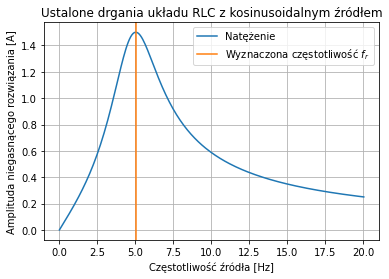

In [5]:
R1, L1, C1, U01 = 20, 1, 0.001, 30
resonance_plot(R1, L1, C1, U01, "Ustalone drgania układu RLC z kosinusoidalnym źródłem")

<center> Wykres 1.

Można patrzeć na ten wykres jako na opis drgań już po upływie pewnego czasu - kiedy rozwiązania układu jednorodnego wygasną.

Gdy spróbujemy manipulować danymi, kształty wykresu ulegną zmianie, ale zawsze wyznaczony punkt będzie punktem rezonansu.

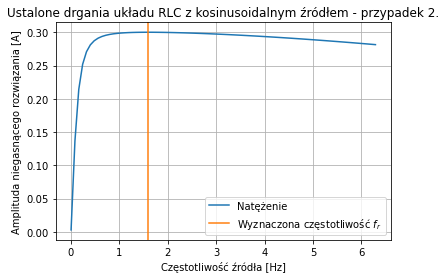

In [6]:
R2, L2, C2, U02 = 100, 1, 0.01, 30
resonance_plot(
    R2,
    L2,
    C2,
    U02,
    "Ustalone drgania układu RLC z kosinusoidalnym źródłem - przypadek 2.",
)

<center> Wykres 2.

## Doświadczenie

Aby sprawdzić, jak w rzeczywistości wygląda wyżej opisana charakterystyka, postanowiliśmy wykonać doświadczenie. Pozwala ono jednocześnie uzyskać jakiś praktyczny efekt. Nie znaliśmy indukcyjności użytej cewki, ale charakterystyka reszty komponentów była znana z pomiarów bezpośrednich. (Miernik uniwersalny nie posiada funkcji mierzenia indukcyjności, a oznaczenia na cewce nie były wyraźne).

Cały układ wraz z generatorem oraz przyrządem pomiarowym przedstawiamy poniżej. Na białej płytce umieszczone są komponenty, opornik jest natomiast równolegle podłączony do miernika.

<img src="images/zestaw_pomiarowy.jpg" style="width: 50%" alt="Zestaw pomiarowy"> 

<center> Fotografia 1. Zestaw pomiarowy <a id="fot1"></a>

Za pomocą miernika uniwersalnego zebraliśmy dane na temat spadku napięcia na oporniku. Jest ono oczywiście z prawa Ohma proporcjonalne do natężenia w oczku [[2]](#bib2).

Zebrane dane zostały uporządkowane w tabeli oraz zaimportowane. Ze względu na jej długość, pokazujemy wyłącznie wycinek tabeli danych. Warto wspomnieć, że interwały mierzonych częstotliwości nie były zupełnie regularne, gdyż nie każdy przedział jest w wartościach tak samo istotny.

In [7]:
df = pd.read_excel("pomiary.xls", header=[0, 1])
df.head()

Częstotliwość (Hz) Napięcie (mV)                                        
                           Próba 1 Próba 2 Próba 3 Próba 4 Próba 5 Średnia
0                  0             0       0       0       0       0     0.0
1                100            20      19      20      19      21    19.8
2                200            38      37      38      37      37    37.4
3                300            55      56      55      56      55    55.4
4                400            73      73      73      72      73    72.8

## Porównanie wyników

Zanim przejdziemy do wizualizacji, podamy zmierzoną specyfikacje podłączonych komponentów oraz źródła.

- Opór rezystora $R = 668 \pm (1.2\% +5)\, \mathrm{\Omega}$.

- Pojemność kondensatora $C = 77 \pm (5\% +5)\, \mathrm{nF}$.

- Źródło sinusoidalne.

- Amplituda napięcia z generatora $U_0 = 22 \pm (0.8\% +3)\, \mathrm{V}$.

Indukcyjność $L$ uznajemy na razie za nieznaną i postaramy się dopasować później jej wartość.

Błąd pomiarów z tabeli jest taki sam, jak napisano przy amplitudzie źródła. Do tego po pięciu wynikach możemy obliczyć odchylenie standardowe. Nie będziemy tego jednak robić ze względu na małą istotność (wartość ta nie byłaby wielka).

Zapiszmy te wartości do zmiennych.

In [8]:
R_exp = 668
C_exp = 77e-9
U0_exp = 0.22

Teraz przedstawimy na wykresie charakterystykę, pamiętając o sprowadzeniu jednostki $\mathrm{mV}$ do $\mathrm{V}$ oraz pomnożeniu ich przez $R$ (z prawa Ohma [1]). Chcemy bowiem otrzymać wartości amplitudy natężenia, a badaliśmy napięcie.

To wszystko pochodzi z danych pomiarowych.

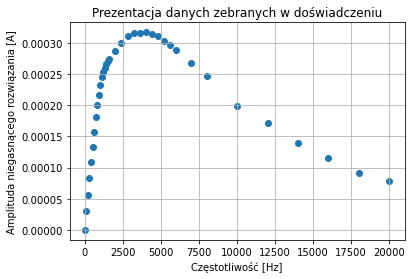

In [9]:
plt.scatter(
    df[("Częstotliwość (Hz)", " ")],
    df[("Napięcie (mV)", "Średnia")] / 1e3 / R_exp,
)
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Amplituda niegasnącego rozwiązania [A]")
plt.title("Prezentacja danych zebranych w doświadczeniu")
plt.show()

<center> Wykres 3.

Na pierwszy rzut oka wykres wygląda dobrze. Właśnie tego typu krzywych powinniśmy się spodziewać - biorąc pod uwagę już dokonaną analizę.

Teraz czas na porównanie tych wyników z teoretyczną krzywą.

Po ręcznej manipulacji wartością indukcyjności okazuje się, że najlepsze dopasowanie to takie wokół $L \approx 23 \mathrm{mH}$. Taką wartość przyjmijmy dla wykresu. Użyjemy do uzyskania krzywej teoretycznej napisaną już wcześniej funkcję. 

Oczywiście można do dopasowania $L$ użyć także funkcji optymalizujących, ale w tym przypadku nie wydaje się to konieczne. 

In [10]:
L_fit = 23e-3

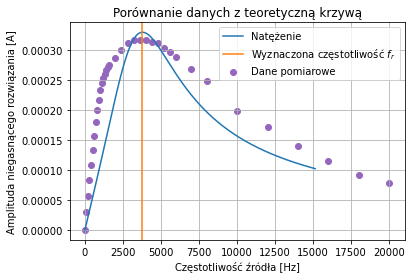

In [11]:
plt.scatter(
    df[("Częstotliwość (Hz)", " ")],
    df[("Napięcie (mV)", "Średnia")] / 1e3 / R_exp,
    color="C4",
    label="Dane pomiarowe",
)
resonance_plot(R_exp, L_fit, C_exp, U0_exp, "Porównanie danych z teoretyczną krzywą")
plt.show()

<center> Wykres 4.

Kształt krzywej utworzonej z danych, choć wygląda bardzo poprawnie, pozostawia sobie wiele do życzenia. Nie da się idealnie dopasować wartości indukcyjności, ale mogliśmy znaleźć jej całkiem dobre przybliżenie.

Konflikt kształtu następuje najpewniej przez niepewności, z jakimi miernik podał dane na temat komponentów.

Udało nam się znaleźć zatem, że najpewniej 

$$L \approx 23 \mathrm{mH},$$

a taki był cel badania towarzyszącego całemu eksperymentowi.

## Wnioski

Krzywa, którą otrzymaliśmy z danych nie była idealnie dopasowana, ale to z dużą pewnością kwestia niepewności pomiarów. Ogólny jej kształt wygląda satysfakcjonująco, a co najważniejsze - jest wyraźne miejsce rezonansu. Potwierdzamy dzięki temu wcześniejsze obliczenia.

Dodatkowo uzyskaliśmy metodę na badanie przybliżonych wartości opisujących podzespoły, gdy brak nam informacji od producenta.

Niezwykle ciekawy jest też sam fakt, że dokładnie ten sam obwód ze źródłem o jednakowej amplitudzie potrafi zmieniać amplitudę drgań w zależności jedynie od częstotliwości źródła. Należy mieć tego świadomość.

# Metody numeryczne

Chcąc uzyskać więcej informacji na temat rozwiązań, niż sama amplituda stanu ustalonego, najlepiej będzie wzbogacić zestaw używanych narzędzi o jedno nowe.

Metody numeryczne rozwiązują problemy, korzystając z operacji na liczbach. Wyniki są zazwyczaj przybliżone, lecz pozwalają na rozwiązywanie znacznie trudniejszych problemów związanych z równaniami różniczkowymi, niż metody analityczne [[6]](#bib6). Poniżej przedstawimy i zaimplementujemy popularne metody numeryczne, które będą niezbędne w dalszej części projektu.

### Implementacja funkcji pomocniczej

Zanim przejdziemy do samych metod numerycznych, przygotujemy funkcję generującą formy takie, że w równaniu różniczkowym

$$y'' = f(t, y, y').$$

Dostosowujemy ją oczywiście do konkretnego przypadku układu szeregowego **RLC** z kosinusoidalnym źródłem i zamykającym się w jednym oczku. Można zatem podać:

- $R$ - opór rezystora (`R`),

- $L$ - indukcyjność cewki (`L`),

- $C$ - pojemność kondensatora (`C`),

- $U_0$ - amplituda napięcia z generatora (`U_0`),

- $\omega$ - częstość napięcia z generatora (`omega`),

- $\theta$ - przesunięcie w fazie (`phase`).

Dalej pozostaniemy już przy oznaczeniach podanych w nawiasach.

In [12]:
def gener_form_cos(R, L, C, U0, omega, phase):
    def form(t, i, i_prim):
        return -(U0 * omega * np.sin(omega * t - phase) + R * i_prim + i / C) / L

    return form

## Metoda Eulera 

Metoda Eulera pomaga rozwiązywać równania różniczkowe. Opiera się na interpretacji geometrycznej równania.
Została ona ujawniona w 1768 roku w podręczniku Leonharda Eulera pt. „*Institutiones calculi differentialis*”, czyli „*Kształcenie w rachunku różniczkowym*” [[7]](#bib7).

Zastępujemy pochodną różnicą skończoną

Dla $h>0$ mamy

$$t_n = n h.$$

Wykorzystując sieczną przybliżamy styczną

$$y'(t_n) \approx \delta_+ y(t_n) = \frac{y(t_n+h)-y(t_n)}{h}.$$

Stąd uzyskujemy również

$$t_n+h = nh + h = \left(n+1\right)h = t_{n+1}.$$

Otrzymujemy

$$y'(t_n)\approx \frac{y(t_{n})-y(t_{n-1})}{h}.$$

Najczęściej okazuje się przydatna się metoda Eulera w przód (ang. forward Euler method - explicit) i jej też użyjemy.

$$f(t_{n-1}, y(t_{n-1}))\approx \frac{y(t_n) - y(t_{n-1})}{h}$$

Podstawiając  $y_n$  jako numeryczne przybliżenie  $y(t_n)$  otrzymujemy [[8]](#bib8)

$$y_n = y_{n-1} + h f(t_{n-1}, y_{n-1}).$$

W naszym algorytmie modyfikujemy metodę oczywiście do równań drugiego rzędu w bardzo prosty sposób przedstawiony w kodzie.
Należy zauważyć, że analogicznie do powyższej metody różniczkowania, funkcja oblicza też kolejne całki i zwraca wszystkie siatki $t$ i $I$, ale także $\frac{dI}{dt}$ oraz $Q=\int_{t_0}^t I(\tau) d\tau$.

### Implementacja

Podajemy w poniższej funkcji na wejściu:
- $t_0$ - chwila początkowa (`t0`),

- $t_n$ - chwila, w której kończy się obliczanie (`tn`),

- $dt$ - krok w czasie - numeryczny odpowiednik różniczki (`dt`),

- $(I(0), \frac{dI}{dt}, Q(0))$ - bezpośrednio podane warunki początkowe - kolejno natężenie, jego pochodna oraz całka (`init_condit`),

- $f(t, y, y')$ - forma z równania różniczkowego drugiego rzędu równa $y''$ - (`form`).


In [13]:
def euler_second(t0, tn, dt, init_condit, form):
    grid_t = np.arange(t0, tn, dt)
    grid_i = grid_t.copy()
    grid_i.fill(0)
    grid_i_prim = grid_t.copy()
    grid_i_prim.fill(0)
    grid_q = grid_t.copy()
    grid_q.fill(0)

    grid_i[0] = init_condit[0]
    grid_i_prim[0] = init_condit[1]
    grid_q[0] = init_condit[2]

    for ind, t in enumerate(grid_t[1:]):
        ind += 1
        prev_i = grid_i[ind - 1]
        prev_i_prim = grid_i_prim[ind - 1]
        grid_i_prim[ind] = prev_i_prim + dt * form(t, prev_i, prev_i_prim)
        grid_i[ind] = prev_i + dt * prev_i_prim
        grid_q[ind] = grid_q[ind - 1] + dt * grid_i[ind]

    return grid_t, grid_i, grid_i_prim, grid_q

Na wyjściu mamy krotkę siatek (tablic) z obliczonymi poszczególnymi wartościami - jest ona postaci czwórki ciągów

$$(\{t_i\}_{i=0}^k, \{I_i\}_{i=0}^k, \{I'_i\}_{i=0}^k, \{Q_i\}_{i=0}^k).$$

## Metoda Midpoint

Metoda midpoint została opracowana na podstawie metody Eulera, 
aczkolwiek zastosowano w niej rozwinięcie w szereg Taylora z dokładnością o jeden krok więcej, niż w metodzie Eulera.
W metodzie tej nachylenie jest szacowane na podstawie wartości $y$ w środku przedziału [[9]](#bib9).

Postępujemy na początku tak samo, jak w metodzie Eulera, ale nasza forma przybierze nieco inną postać, gdyż - jak wspomniano - bierzemy punkty środkowe:

$$f(t_{n-1}+\frac{h}{2}, y_{n-1}+\frac{h}{2}f(t_{n-1},y_{n-1}))\approx \frac{y(t_n) - y(t_{n-1})}{h}$$

Tutaj również modyfikujemy naszą metodę dla obsługi równań drugiego rzędu i tak samo jak poprzedniczka, oblicza ona całki.

### Implementacja

Korzystamy z tego samego wejścia i dostajemy to samo wyjście jak poprzednio.

In [14]:
def midpoint_second(t0, tn, dt, init_condit, form):
    grid_t = np.arange(t0, tn, dt)
    grid_i = grid_t.copy()
    grid_i.fill(0)
    grid_i_prim = grid_t.copy()
    grid_i_prim.fill(0)
    grid_q = grid_t.copy()
    grid_q.fill(0)

    grid_i[0] = init_condit[0]
    grid_i_prim[0] = init_condit[1]
    grid_q[0] = init_condit[2]

    for ind, t in enumerate(grid_t[1:]):
        ind += 1
        prev_i = grid_i[ind - 1]
        prev_i_prim = grid_i_prim[ind - 1]
        prev_q = grid_q[ind - 1]

        grid_i_prim[ind] = prev_i_prim + dt * form(
            t + dt / 2,
            prev_i + dt * prev_i_prim / 2,
            prev_i_prim + dt * form(t, prev_i, prev_i_prim) / 2,
        )

        grid_i[ind] = prev_i + dt * (prev_i_prim + grid_i_prim[ind]) / 2
        grid_q[ind] = prev_q + dt * (prev_i + grid_i[ind]) / 2

    return grid_t, grid_i, grid_i_prim, grid_q

## Błędy

Istnienie wielu metod numerycznych wskazuje na to, że są one różnej jakości, bądź mają różne zastosowania. Postaramy się więc przyjrzeć obu zaimplementowanym przez nas funkcjom i zweryfikować ich działanie.

### Sposób weryfikacji

Pierwszym krokiem do sprawdzenia działania obu metod będzie opracowanie systemu kalkulacji błędów odcięcia. Pochylimy się nad pochodnymi, bo liczymy właśnie ich błąd [[10]](#bib10).

Możemy użyć [[11]](#bib11) błędu bezwzględnego
$$ \Delta_A (x) = |\delta y(x) - y'(x)|
$$

oraz wynikającego z niego błędu względnego

$$ \Delta_R (x) = \frac{\Delta_A(x)}{|\delta y(x)|},$$

gdzie $\delta y(x)$ jest wartością pochodnej liczoną numerycznie, a $y'$ - bezpośrednio ze wzoru.

Jednym z pomysłów [[10]](#bib10) jest zastosowanie

$$\delta y(x) = \delta_+ y(x) = \frac{y(x+h)-y(x)}{h},$$

docelowo dla małego $h>0$.

Nie jest to metoda najdokładniejsza z możliwych i można ją modyfikować, chociaż wystarczyłaby generalnie do naszych celów.

Funkcje liczące wartości numerycznie dostarczają jednak również tablicę pochodnych - i to zwykle dokładniej liczonych. Skorzystamy zatem z tej tablicy tak, że

$$\delta y(x) = \delta_f y(x),$$

gdzie $\delta_f y(x)$ to właśnie numerycznie liczone pochodne, dostarczone przez daną funkcję.

Będziemy zatem liczyć $ \Delta_R (x)$ z użyciem tych dostarczonych już tablic.

Konstruujemy teraz funkcję, która zbada wspomniane błędy względne. Będzie korzystała z tablicy wartości obliczonych bezpośrednio ze wzorów oraz tablicy wartości uzyskanych dzięki metodzie numerycznej i je otrzyma na wejściu. Na wyjściu wyda tablicę $ \Delta_R (x)$ dla całego dyskretnego zbioru argumentów.

In [15]:
def rel_error(an_data, num_data):
    return np.abs(an_data - num_data) / np.abs(num_data)

### Przykładowe warunki

Wiemy już, że po dość niedługim czasie trwania stanu nieustalonego ujawnia się stabilne rozwiązanie w postaci raczej prostej funkcji okresowej. Takie rozwiązanie więc dominuje w całości i spróbujemy przyjrzeć się jedynie jemu.

Możemy przyjąć za podstawę do badania prostą funkcję okresową $y = sin(x)$ i zapomnieć na chwilę o wygasającym rozwiązaniu. Daje ona widocznie dobry pogląd na ogólny przypadek, gdyż - jak wiemy ze wzorów - powstające stabilne rozwiązanie przy sinusoidalnym źródle jest też sinusoidalne (pomijając przesunięcia fazowe rzecz jasna).

Potrzebujemy pochodnych analitycznych i numerycznych tej funkcji $y(x)$. Najpierw weźmy tą pierwszą:

$$\frac{d}{dt}sin(x) = cos(x).$$

Metoda numeryczna przyjmuje na wejściu formę, więc zastanówmy się jaka forma oznacza sinusa. Jest to oczywiście 

$$y'' = f(t, y, y') = -y,$$

ale z warunkami początkowymi 

$$y(0) = 0, \, y'(0) = 1.$$

Dowód faktu, iż $y = \sin(x)$ to jedyne rozwiązanie podanego układu można prosto przeprowadzić, używając standardowych metod dla równań drugiego rzędu [[3]](#bib3).

Tworzymy zatem jakąś siatkę rozwiązań. Czas niech biegnie od $0$ do $100\,\mathrm{s}$. Krok weźmy dość duży, aby wyraźnie widzieć niedokładność - $dt = 0.01\,\mathrm{s}$.

In [16]:
err_t0 = 0
err_tn = 100
err_dt = 0.01

err_grid_t = np.arange(err_t0, err_tn, err_dt)

Następnie liczymy wartości pochodnych bezpośrednio oraz z użyciem obu metod numerycznych. W ostatnim przypadku używamy wymienionej wyżej formy (na bieżąco definiowanej komendą `lambda`) oraz warunków początkowych (dodatkowo z zerowym warunkiem trzecim - choć nie ma on wpływu akurat na ten wynik).

In [17]:
err_an_vals = np.cos(err_grid_t)
# pochodne analitycznie


err_num_vals_euler = euler_second(
    err_t0, err_tn, err_dt, (0, 1, 0), lambda t, y, y_prim: -y
)[2]
# element krotki przedstawiający pochodne numeryczne "euler"

err_num_vals_midpoint = midpoint_second(
    err_t0, err_tn, err_dt, (0, 1, 0), lambda t, y, y_prim: -y
)[2]
# element krotki przedstawiający pochodne numeryczne "midpoint"

### Porównanie metod i wnioski

Narysujmy najpierw samą pochodną numeryczną i porównajmy ją z analityczną dla obu metod.

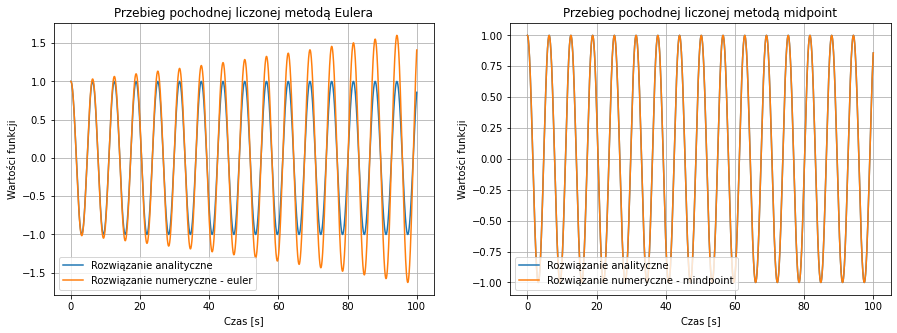

In [18]:
fig_err1, ax_err1 = plt.subplots(1, 2, figsize=(15, 5))

ax_err1[0].plot(err_grid_t, err_an_vals, label="Rozwiązanie analityczne")
ax_err1[0].plot(err_grid_t, err_num_vals_euler, label="Rozwiązanie numeryczne - euler")
ax_err1[0].set_xlabel("Czas [s]")
ax_err1[0].set_ylabel("Wartości funkcji")
ax_err1[0].set_title("Przebieg pochodnej liczonej metodą Eulera")

ax_err1[0].legend(loc=3)

ax_err1[1].plot(err_grid_t, err_an_vals, label="Rozwiązanie analityczne")
ax_err1[1].plot(
    err_grid_t, err_num_vals_midpoint, label="Rozwiązanie numeryczne - mindpoint"
)
ax_err1[1].set_xlabel("Czas [s]")
ax_err1[1].set_ylabel("Wartości funkcji")
ax_err1[1].set_title("Przebieg pochodnej liczonej metodą midpoint")

ax_err1[1].legend(loc=3)

plt.show()

<center> Wykresy 5. <a id="wyk5"></a>

Wyraźnie widać, że w przypadku metody Eulera błąd szybko zaczyna się kumulować i wykres nie jest prawidłowy. Metoda midpoint zdaje się nawet dla tak dużego kroku prawie pokrywać z wykresem funkcji analitycznej. Możemy powoli wnioskować, że ta pierwsza nie nadaje się dobrze do rozwiązywania równań z okresowymi wynikami.

Zilustrujmy jeszcze błędy względne z użyciem zaimplementowanej funkcji `rel_error`.

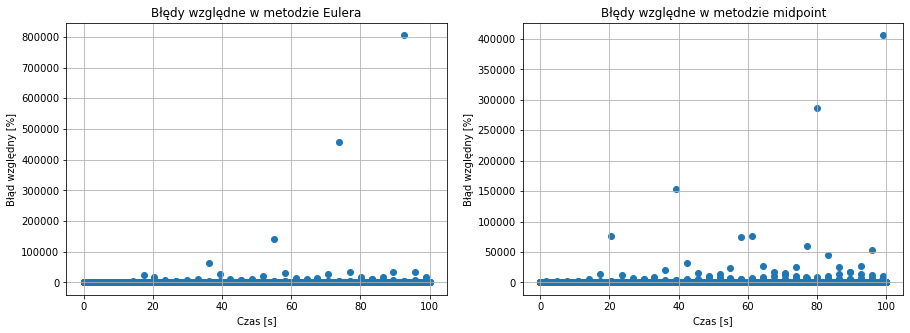

In [19]:
fig_err2, ax_err2 = plt.subplots(1, 2, figsize=(15, 5))

ax_err2[0].scatter(err_grid_t, rel_error(err_grid_t, err_num_vals_euler))
ax_err2[0].set_xlabel("Czas [s]")
ax_err2[0].set_ylabel("Błąd względny [%]")
ax_err2[0].set_title("Błędy względne w metodzie Eulera")

ax_err2[1].scatter(err_grid_t, rel_error(err_grid_t, err_num_vals_midpoint))
ax_err2[1].set_xlabel("Czas [s]")
ax_err2[1].set_ylabel("Błąd względny [%]")
ax_err2[1].set_title("Błędy względne w metodzie midpoint")


plt.show()

<center> Wykresy 6.

Wyżej widać, że skala jest inna w przypadku obu metod. Nałóżmy jeszcze na siebie oba zestawy danych.

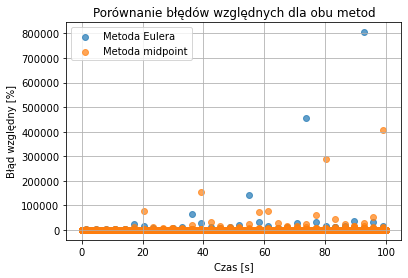

In [20]:
plt.scatter(
    err_grid_t,
    rel_error(err_grid_t, err_num_vals_euler),
    alpha=0.7,
    label="Metoda Eulera",
)
plt.scatter(
    err_grid_t,
    rel_error(err_grid_t, err_num_vals_midpoint),
    alpha=0.7,
    label="Metoda midpoint",
)

plt.xlabel("Czas [s]")
plt.ylabel("Błąd względny [%]")
plt.title("Porównanie błędów względnych dla obu metod")
plt.legend(loc=2)
plt.show()

<center> Wykres 7.

Wyraźnie metoda Eulera osiąga gorsze wyniki. Dodając do tego błędy **względne**, widoczne na zestawie [wykresów 5.](#wyk5), decydujemy się jasno na rezygnację z metody Eulera.

Dalej będziemy już używać **tylko metody midpoint**.

# Natężenie i napięcie w układach RLC

Wiemy teraz, której metody numerycznej najlepiej używać. Przejdziemy więc do części, gdzie sprawdzimy jak zachowuje się natężenie oraz napięcie na różnych komponentach w prostym układzie RLC - takim jak na [rys. 1](#rys1). 



## Przypadek źródła sinusoidalnego

Podajmy charakterystykę komponentów używanych w pierwszej z następujących symulacji.

- Opór rezystora $R = 80\, {\Omega}$.

- Indukcyjność cewki $R = 20\, \mathrm{H}$.

- Pojemność kondensatora $C = 200\, \mu \mathrm{F}$.

- Amplituda napięcia z generatora $U_0 = 30\, \mathrm{V}$.

- Częstość źródła $U_0 = 40\, \frac{1}{\mathrm{s}}$.

- Przesunięcie w fazie źródła - takie żeby zaczynać od $0$. W przypadku generującą formę dla źródła $\cos(\omega t - \theta)$, użyjmy $\theta = \frac{\pi}{2}$.

Do tego niech metoda numeryczna liczy od $t_0 = 0$ do $t_n = 2\, \mathrm{s}$ z krokiem $dt = h = 0.001 \, \mathrm{s}$.

Przyjmiemy też **zerowe warunki początkowe** dla wszystkich wykresów. W przeciwnym razie musielibyśmy posłużyć się odrobiną fizyki, która jest raczej na tym etapie zupełnie zbędna. Przy rozpoczęciu działania obwodu i rozładowanym kondensatorze takie warunki są zupełnie naturalne. Pozostawiamy ten fakt bez starannego wyjaśnienia, ponieważ już same rezultaty na tych warunkach są bardzo interesujące, więc można spokojnie pozostać przy tym stanie.

Dlatego też:

In [21]:
R = 80
L = 20
C = 0.0002
U0 = 30
omega = 40
phase = np.pi / 2

t0 = 0
tn = 2
dt = 0.001

init_condit = (0, 0, 0)

### Ogólna analiza

In [22]:
tabs_sin = midpoint_second(
    t0, tn, dt, init_condit, gener_form_cos(R, L, C, U0, omega, phase)
)

Z tablic dostarczonych przez funkcję wyznaczamy czas, natężenie i spadki napięć na wszystkich komponentach, tak jak to opisano we wstępie - według praw fizyki [[2]](#bib2). Oczywiście `Ur` oznacza natężenie na oporniku, `Ul` na cewce, a `Uc` na kondensatorze.

In [23]:
arg_tab_sin = tabs_sin[0]  # czas

val_tab_sin_I = tabs_sin[1]  # natężenie
val_tab_sin_Ur = R * tabs_sin[1]  # napięcie - opornik
val_tab_sin_Ul = L * tabs_sin[2]  # napięcie - cewka
val_tab_sin_Uc = tabs_sin[3] / C  # napięcie - kondensator

Przy okazji implementujemy funkcję rysującą zestawy wykresów, a przydatną także później.

In [24]:
def curr_plot(arg_tab, val_tab_I, val_tab_Ur, val_tab_Ul, val_tab_Uc):
    fig, ax = plt.subplots(4, figsize=(10, 15))
    plt.subplots_adjust(hspace=0.5)

    ax[0].plot(arg_tab, val_tab_I * 1000, color="C1")
    ax[0].set_xlabel("Czas [s]")
    ax[0].set_ylabel("Natężenie [mA]")
    ax[0].set_title("Zmiany natężenia prądu w całym układzie")

    ax[1].plot(arg_tab, val_tab_Ur, color="C0")
    ax[1].set_xlabel("Czas [s]")
    ax[1].set_ylabel("Napięcie [V]")
    ax[1].set_title("Spadek napięcia na oporniku")

    ax[2].plot(arg_tab, val_tab_Ul, color="C0")
    ax[2].set_xlabel("Czas [s]")
    ax[2].set_ylabel("Napięcie [V]")
    ax[2].set_title("Spadek napięcia na cewce")

    ax[3].plot(arg_tab, val_tab_Uc, color="C0")
    ax[3].set_xlabel("Czas [s]")
    ax[3].set_ylabel("Napięcie [V]")
    ax[3].set_title("Spadek napięcia na kondensatorze")

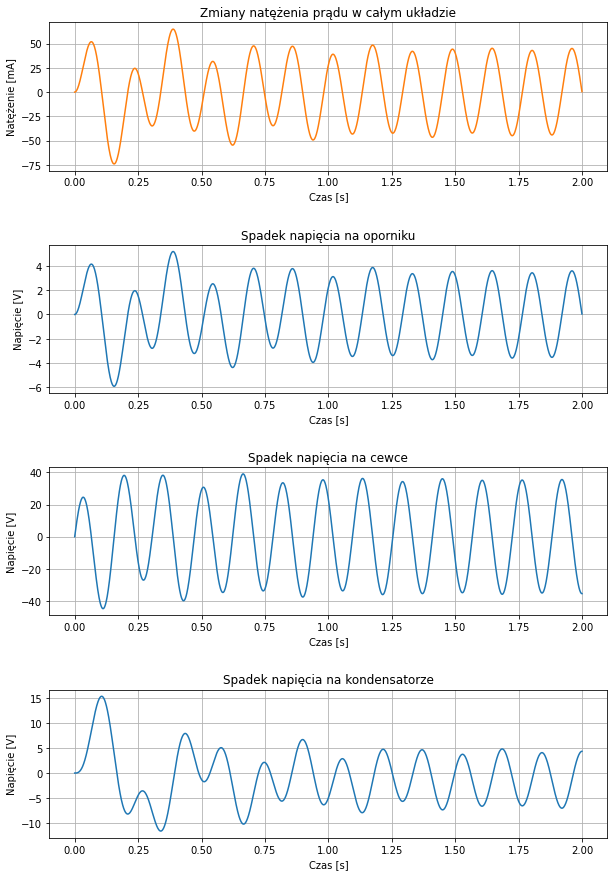

In [25]:
curr_plot(arg_tab_sin, val_tab_sin_I, val_tab_sin_Ur, val_tab_sin_Ul, val_tab_sin_Uc)

<center> Wykresy 8. <a id="wyk8"></a>

Rozwiązanie dotyczące natężenia przyjmuje oczekiwaną formę - omawianą już niejednokrotnie na podstawie równania.

Spadek napięcia na oporniku jest proporcjonalny do tegoż natężenia [[2]](#bib2), dlatego nie ma dla niego przesunięcia w fazie:

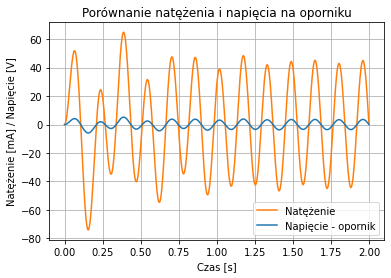

In [26]:
plt.plot(arg_tab_sin, val_tab_sin_I * 1000, color="C1", label="Natężenie")
plt.plot(arg_tab_sin, val_tab_sin_Ur, color="C0", label="Napięcie - opornik")

plt.xlabel("Czas [s]")
plt.ylabel("Natężenie [mA] / Napięcie [V]")
plt.title("Porównanie natężenia i napięcia na oporniku")
plt.legend()
plt.show()

<center> Wykres 9.

Teraz możemy odwołać się do napięcia na oporniku i przedstawić razem wszystkie trzy spadki napięć.

<u>Wartości na wykresach zostały przemnożone przez odpowiedni współczynnik dla pewnej ich normalizacji.</u>

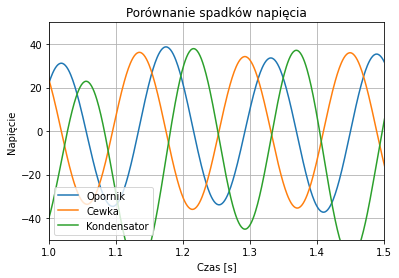

In [27]:
plt.plot(arg_tab_sin, val_tab_sin_Ur * 10, label="Opornik")
plt.plot(arg_tab_sin, val_tab_sin_Ul, label="Cewka")
plt.plot(arg_tab_sin, val_tab_sin_Uc * 8, label="Kondensator")

plt.xlim((1, 1.5))
plt.ylim((-50, 50))

plt.xlabel("Czas [s]")
plt.ylabel("Napięcie")
plt.title("Porównanie spadków napięcia")
plt.legend(loc=3)
plt.show()

<center> Wykres 10.

Chodzi nam głównie o „górki”. 

Przyjrzyjmy się teraz spadkowi na cewce. Widzimy tutaj przesunięcie w fazie, ponieważ we wzorze używamy pochodnej natężenia.

Jeśli chodzi o napięcie na kondensatorze, to tutaj również mamy przesunięcie w fazie, ponieważ we wzorze używamy całki natężenia. Przesunięcie jest natomiast w drugą stronę.

Te fakty wynikają z właściwości funkcji $\sin(x)$.

Same wykresy w stanie nieustalonym też są interesujące. Widzimy wahania dające wrażenie chaotycznych i dodatkowo dla każdego komponentu wyglądają (mowa o napięciu) zupełnie inaczej. Ogólna amplituda na początku jest inna niż ta, która się ustala. W przedstawionym przypadku jest akurat większa.

### Manipulacja warunkami

Dla tego najprostszego źródła zmieńmy może jeszcze charakterystykę układu i zobaczmy co stanie się z wykresami. Większość wartości pozostawimy tak, jak zdefiniowano, ale zmienimy np.:

- Nowy opór rezystora $R = 50\, {\Omega}$.

- Nowa indukcyjność cewki $L = 50\, \mathrm{H}$.

Indukcyjność zmieni charakter wykresu, a mniejszy opór wraz z samą zmienioną indukcyjnością będzie oznaczał dłuższe trwanie stanu nieustalonego (wyprowadzenie równia wspomina o współczynniku tłumienia $\alpha = \frac{R}{2L}$).

Przygotowujemy wykresy analogicznie jak wyżej, stąd pozostawiamy kod bez dłuższego opisu.

In [28]:
tabs_sin2 = midpoint_second(
    t0, tn, dt, init_condit, gener_form_cos(50, 50, C, U0, omega, phase)
)

In [29]:
arg_tab_sin2 = tabs_sin2[0]

val_tab_sin2_I = tabs_sin2[1]
val_tab_sin2_Ur = R * tabs_sin2[1]
val_tab_sin2_Ul = L * tabs_sin2[2]
val_tab_sin2_Uc = tabs_sin2[3] / C

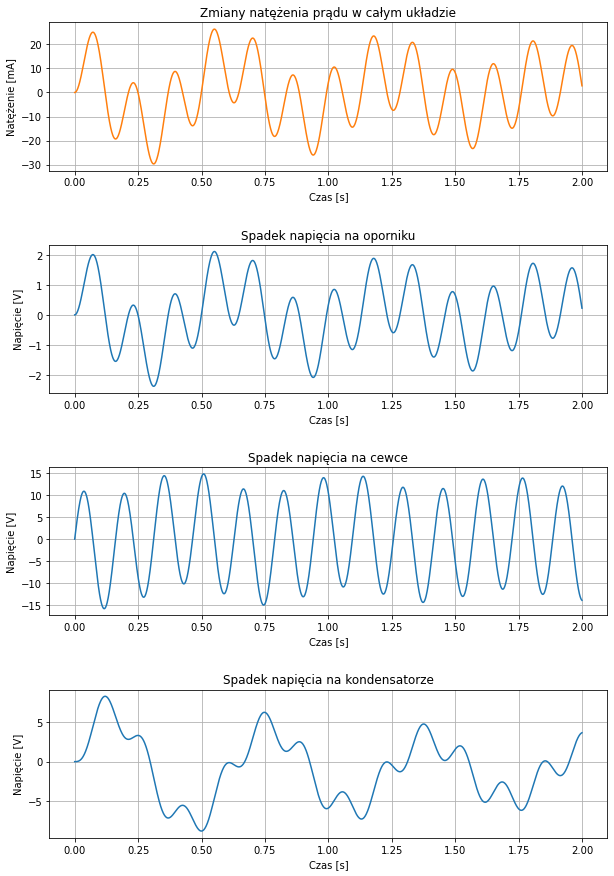

In [30]:
curr_plot(
    arg_tab_sin2, val_tab_sin2_I, val_tab_sin2_Ur, val_tab_sin2_Ul, val_tab_sin2_Uc
)

<center> Wykresy 11.

Widać, że rzeczywiście dłużej twa stan nieustalony, obwiednia powoli maleje w amplitudzie. Wykresy wyglądają zupełnie inaczej niż na zestawie [wykresów 8](#wyk8).

Jasne jest więc, iż rozwiązania mają bardzo różne postaci dla tego samego źródła, ale różnych komponentów.

# Podsumowanie

Projektu był podzielony na kilka podczęści omawiające różne aspekty zagadnienia, a każde z nich zostało zaopatrzone w podstawę teoretyczną, klarowną wizualizację oraz wnioski. 

Ostatecznie możemy powiedzieć, że udało nam się znaleźć analityczne rozwiązanie ogólne dla prostych przypadków źródeł w jednooczkowych, klasycznych układach RLC. Zbadaliśmy też zjawisko rezonansu na płaszczyźnie teoretycznej oraz porównaliśmy je z przypadkiem eksperymentalnym. Okazało się, że wszystko, co wyprowadziliśmy rzeczywiście zachodzi, a dodatkowo jesteśmy w stanie w praktyce zastosować prezentowaną wiedzę. Dla trudniejszych źródeł i wygodnej analizy zaimplementowaliśmy funkcje numeryczne i zbadaliśmy ich zachowanie, akceptując tylko jedną z nich. Przedstawiając przebieg napięcia i natężenia dla pewnych źródeł dokonaliśmy obserwacji i wgłębiliśmy się nieco w zasadę działania komponentów.

Możemy więc stosować w praktyce zaprezentowane tu narzędzia i prowadzić przewidywanie zachowania się prądu w prostych zestawach drgających. Mając taką wiedzę, moglibyśmy rozszerzać i uogólniać przedstawione przypadki oraz symulować działanie innych układów podobnego typu. Potwierdziliśmy swoje obliczenia matematyczne i skonfrontowaliśmy je z rzeczywistością, stąd - po uprzednim dogłębnym ich zrozumieniu - jesteśmy pewni, że można je stosować w technice.

# Bibliografia

<a id="bib1">[1]</a> D. Halliday; R. Resnick, *Fundamentals of Physics*, 2007, s. 911.

<a id="bib2">[2]</a> M. Gewert; Z. Skoczylas, *Równania różniczkowe zwyczajne*, Wrocław 2016, s. 92-94.

<a id="bib3">[3]</a> Ł. Płociniczak, *Ordinary differential equations in science and technology*, 2020, s. 50-57; 62.

<a id="bib4">[4]</a> Tamże, s. 63.

<a id="bib5">[5]</a> M. Szulim, *Rezonans w obwodach elektrycznych*, *Wykład: Obwody i sygnały 1*. [dostęp: 01.01.2022]. Dostęp w Internecie: https://zoise.wel.wat.edu.pl/dydaktyka/WEL%20niestacjonarne/Wyklady/07_Rezonans_obwod_elektryczny.pdf.

<a id="bib6">[6]</a> A. Bjorck; G. Dahlquist, *Metody Numeryczne*, Wrszawa 1987, s. 9

<a id="bib7">[7]</a> J. C. Butcher, *Numerical Methods for Ordinary Differential Equations*, Nowy Jork 2016, s. 55

<a id="bib8">[8]</a> E. Süli; D. Mayers, *An Introduction to Numerical Analysis*, Nowy Jork 2003, s. 328

<a id="bib9">[9]</a> J. C. Butcher, *Numerical Methods for Ordinary Differential Equations*, Nowy Jork 2016, s. 98

<a id="bib10">[10]</a> Ł. Płociniczak, *Ordinary differential equations in science and technology*, 2020, s. 43

<a id="bib11">[11]</a> E. A. Vlokow, *Numerical Methods*, Moskwa 1990, s. 19

Schemat układu ([rysunek 1.](#rys1)) został wygenerowany z pomocą strony Circuit Diagram. [dostęp: 01.01.2022]. Dostęp w Internecie: https://www.circuit-diagram.org/editor/.